In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data1 = pd.read_csv("C:\\Users\\Admin\\Desktop\\Swayam\\income(1).csv",na_values = [" ?"])

In [3]:
data1

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [4]:
data = data1.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [8]:
summarynum = data.describe()

In [9]:
summarynum

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
summarycat = data.describe(include = "object")

In [11]:
summarycat

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [12]:
data["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [13]:
data["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
data["relationship"].value_counts()

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64

In [15]:
missing = data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [16]:
data2 = data.dropna(axis = 0)
data2.shape

(30162, 13)

# Relationship between independent variables

# Numerical Variables

In [17]:
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# CrossTables and DataVisualization

# Categorical Variables

In [18]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [19]:
gender = pd.crosstab(index = data2["gender"],
                    columns = 'count',
                    normalize = True)

gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [20]:
gendervsalarystatus = pd.crosstab(index = data2["gender"],
                                 columns = data2["SalStat"],
                                 margins = True,
                                 normalize = True)

gendervsalarystatus

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,0.036868,0.287448,0.324315
Male,0.212055,0.463630,0.675685
All,0.248922,0.751078,1.000000


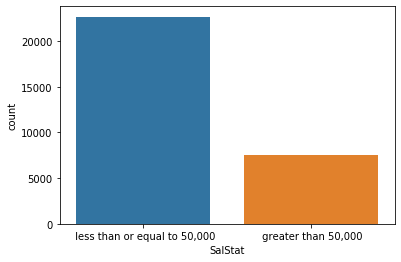

In [21]:
sns.countplot(data2["SalStat"])

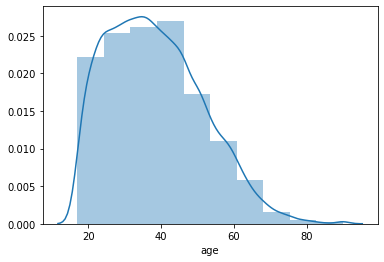

In [22]:
sns.distplot(data2["age"] , bins = 10 )

In [23]:
agevsalarystatus = pd.crosstab(index = data2["age"],
                                 columns = data2["SalStat"],
                                 margins = True,
                                 normalize = True)

agevsalarystatus


SalStat,"greater than 50,000","less than or equal to 50,000",All
age,,,
17,0.000000,0.010875,0.010875
18,0.000000,0.014820,0.014820
19,0.000033,0.019660,0.019694
20,0.000000,0.020854,0.020854
21,0.000099,0.020489,0.020589
...,...,...,...
85,0.000000,0.000099,0.000099
86,0.000000,0.000033,0.000033
88,0.000000,0.000099,0.000099


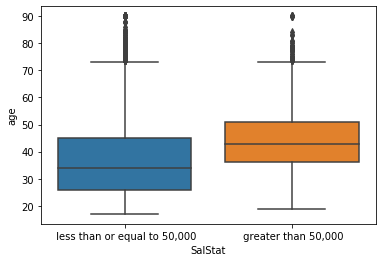

In [24]:
sns.boxplot("SalStat" , "age" , data = data2)

In [25]:
data2.groupby("SalStat")["age"].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

# Exploratory Data Analysis

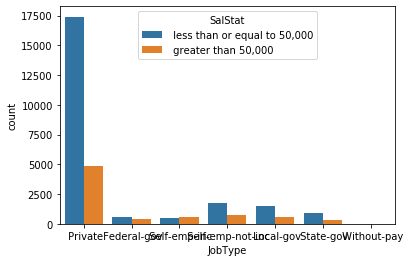

In [26]:
sns.countplot(x = "JobType" , data = data2 , hue = "SalStat")

In [27]:
pd.crosstab(index = data2["JobType"],
           columns = data2["SalStat"],
           dropna = True)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,365,578
Local-gov,609,1458
Private,4876,17410
Self-emp-inc,600,474
Self-emp-not-inc,714,1785
State-gov,344,935
Without-pay,0,14


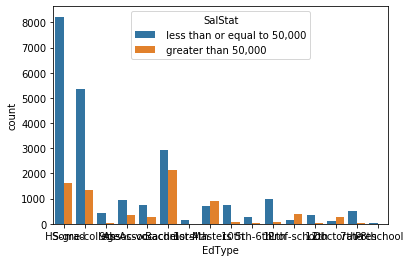

In [28]:
sns.countplot(x = "EdType" , data = data2 , hue = "SalStat")

In [29]:
pd.crosstab(index = data2["EdType"],
           columns = data2["SalStat"],
           dropna = True)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,59,761
11th,59,989
12th,29,348
1st-4th,6,145
5th-6th,12,276
7th-8th,35,522
9th,25,430
Assoc-acdm,256,752
Assoc-voc,344,963


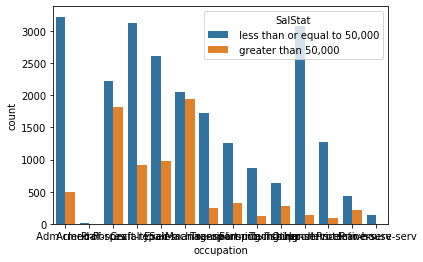

In [30]:
sns.countplot(x = "occupation" , data = data2 , hue = "SalStat")

In [31]:
pd.crosstab(index = data2["occupation"],
           columns = data2["SalStat"],
           dropna = True)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,498,3223
Armed-Forces,1,8
Craft-repair,908,3122
Exec-managerial,1937,2055
Farming-fishing,115,874
Handlers-cleaners,83,1267
Machine-op-inspct,245,1721
Other-service,132,3080
Priv-house-serv,1,142


(array([2.943e+04, 5.000e+02, 7.900e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.480e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

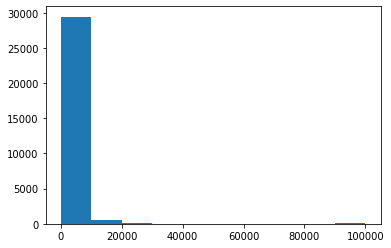

In [32]:
plt.hist(data2["capitalgain"])

(array([2.8744e+04, 1.7000e+01, 2.0000e+01, 4.2300e+02, 7.5100e+02,
        1.8900e+02, 1.1000e+01, 0.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

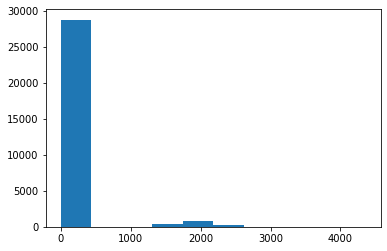

In [33]:
plt.hist(data2["capitalloss"])

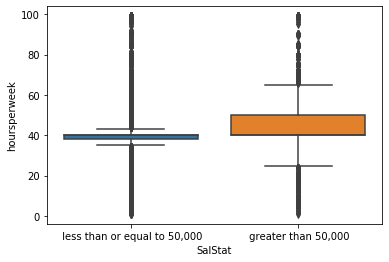

In [34]:
sns.boxplot( x = data2["SalStat"] , y = data2["hoursperweek"])

# Case Study on Classification Part II

# LOGISTIC REGRESSION

# Converting the Categorical variable into Numerical Variable as the Machine Learning Algorithm works only on Numerical Variable

# The Method we used here is integer encoding,so that we can invert the encoding later and get the labels back from integer value

In [35]:
data2["SalStat"] = data2["SalStat"].map({ ' less than or equal to 50,000' : 0 , ' greater than 50,000' : 1})


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


# Using the pandas function get_dummies we can convert the categorical variables into dummy variable which is called as one hot encoding(it refers to splitting the columns which has categorical data to many columns depending on number of categories present in the column¶

In [37]:
newdata = pd.get_dummies(data2 , drop_first = True)

In [38]:
newdata

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Next we are going to select the features where we need to divide the given columns into two types that is one having independent variables and one having the dependent variables

# For that we are going to store column names as a list by accessing the column names from the newdata(dataframe) and we are storing it under a list called columns_list.

# So it will have only the column names from the newdata(dataframe)

In [39]:
columns_list = list(newdata.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

# Seperating the input variables from the data

In [40]:
features = list(set(columns_list) - set(["SalStat"]))

In [41]:
features

['EdType_ Bachelors',
 'nativecountry_ Honduras',
 'nativecountry_ Hungary',
 'EdType_ Assoc-acdm',
 'nativecountry_ Portugal',
 'maritalstatus_ Never-married',
 'gender_ Male',
 'capitalloss',
 'occupation_ Other-service',
 'nativecountry_ Ecuador',
 'EdType_ 12th',
 'nativecountry_ Vietnam',
 'nativecountry_ Philippines',
 'occupation_ Armed-Forces',
 'JobType_ State-gov',
 'nativecountry_ Trinadad&Tobago',
 'occupation_ Protective-serv',
 'nativecountry_ China',
 'EdType_ Doctorate',
 'nativecountry_ Canada',
 'nativecountry_ Japan',
 'nativecountry_ Dominican-Republic',
 'JobType_ Self-emp-inc',
 'nativecountry_ France',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ Cuba',
 'nativecountry_ Yugoslavia',
 'relationship_ Wife',
 'occupation_ Exec-managerial',
 'nativecountry_ Thailand',
 'EdType_ Assoc-voc',
 'nativecountry_ Taiwan',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Machine-op-inspct',
 'nativecountry_ India',
 'nativecountry_ El-Salvador',
 'maritalstatus_ Separate

# Dependent Variables we are going to represent using letter called y and the independent variables being represented as x

# Storing the output values in y

In [42]:
y = newdata["SalStat"].values #(.values can be used to extract the values from a  dataframe or the vector)

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
y.shape

(30162,)

# Storing the values from input features and storing it in x

In [45]:
x = newdata[features].values

In [46]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
x.shape

(30162, 94)

# Splitting the data into train and test

In [48]:
train_x , test_x , train_y , test_y = train_test_split(x, y , test_size = 0.3 , random_state = 0)

In [49]:
train_x.shape

(21113, 94)

In [50]:
test_x.shape

(9049, 94)

In [51]:
train_y.shape

(21113,)

In [52]:
test_y.shape

(9049,)

# Make an instance of the Model

In [53]:
logistic= LogisticRegression()

# Fitting the Values for x and y

In [54]:
#logistic.fit(train_x , train_y)

In [55]:
logistic.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
logistic.intercept_

# Predicting with the test Dataset

In [ ]:
#prediction = logistic.predict(test_x)

In [ ]:
prediction

# Evaluating the Model using the Confusion Matrix

# Confusion Matrix is a table that is used to evaluate the performance of the classification model

In [ ]:
#confusion_matrix = confusion_matrix(test_y , prediction)

In [56]:
#confusion_matrix

# Calculating the Accuracy

In [57]:
#accuracy_score = accuracy_score(test_y , prediction)


In [58]:
#accuracy_score

# Thereby printing the number of Misclassified values from the prediction

In [59]:
#print("Misclassified samples : %d" % (test_y != prediction).sum())

# Removing the Insignificant Variables that might not contribute more in classifying the individual Salary Status

In [60]:
data2["SalStat"] = data2["SalStat"].map({ ' less than or equal to 50,000' : 0 , ' greater than 50,000' : 1})

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,NaN
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,NaN
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,NaN
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,NaN
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,NaN
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,NaN
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,NaN


In [62]:
cols = ["gender" , "nativecountry" , "race" , "JobType"]
data2 = data2.drop(cols , axis = 1)

In [63]:
newdata

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
newdata = pd.get_dummies (newdata , drop_first = True)

In [65]:
newdata

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
columns_list = list(newdata.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [67]:
features = list(set(columns_list) - set(["SalStat"]))
features

['EdType_ Bachelors',
 'nativecountry_ Honduras',
 'nativecountry_ Hungary',
 'EdType_ Assoc-acdm',
 'nativecountry_ Portugal',
 'maritalstatus_ Never-married',
 'gender_ Male',
 'capitalloss',
 'occupation_ Other-service',
 'nativecountry_ Ecuador',
 'EdType_ 12th',
 'nativecountry_ Vietnam',
 'nativecountry_ Philippines',
 'occupation_ Armed-Forces',
 'JobType_ State-gov',
 'nativecountry_ Trinadad&Tobago',
 'occupation_ Protective-serv',
 'nativecountry_ China',
 'EdType_ Doctorate',
 'nativecountry_ Canada',
 'nativecountry_ Japan',
 'nativecountry_ Dominican-Republic',
 'JobType_ Self-emp-inc',
 'nativecountry_ France',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ Cuba',
 'nativecountry_ Yugoslavia',
 'relationship_ Wife',
 'occupation_ Exec-managerial',
 'nativecountry_ Thailand',
 'EdType_ Assoc-voc',
 'nativecountry_ Taiwan',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Machine-op-inspct',
 'nativecountry_ India',
 'nativecountry_ El-Salvador',
 'maritalstatus_ Separate

In [68]:
y = newdata["SalStat"].values #(.values can be used to extract the values from a  dataframe or the vector)
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
x = newdata[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
train_x , test_x , train_y , test_y = train_test_split(x, y , test_size = 0.3 , random_state = 0)

In [71]:
train_x.shape

(21113, 94)

In [72]:
train_y.shape

(21113,)

In [73]:
test_x.shape

(9049, 94)

In [74]:
 test_y .shape

(9049,)

In [75]:
logistic= LogisticRegression()

In [76]:
#logistic.fit(train_x , train_y)

In [77]:
#prediction = logistic.predict(test_x)

In [78]:
#prediction

In [79]:
#confusion_matrix = confusion_matrix(test_y , prediction)

In [80]:
#confusion_matrix

In [81]:
#accuracy_score = accuracy_score(test_y , prediction)

In [82]:
#accuracy_score

# Buliding KNN Classifier Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [84]:
import matplotlib.pyplot as plt

In [85]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [86]:
KNN_classifier.fit(train_x , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
train_x.shape

(21113, 94)

In [88]:
prediction = KNN_classifier.predict(test_x)

In [89]:
confmatrix = confusion_matrix(test_y , prediction)
confmatrix

array([[6181,  642],
       [ 814, 1412]], dtype=int64)

In [90]:
accurac_score = accuracy_score(test_y , prediction)

In [91]:
accurac_score

0.839098242899768

In [92]:
print("Misclassified Samples : %d" % (test_y != prediction).sum())

Misclassified Samples : 1456


# Effect of K Value in our Classifier

# Calculating Error for K Values between 1 and 20

In [93]:
Misclassified_sample = []

for i in range(1,20):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i)
    KNN_classifier.fit(train_x , train_y)
    pred_i = KNN_classifier.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    

In [94]:
Misclassified_sample

[1763,
 1509,
 1510,
 1431,
 1456,
 1445,
 1461,
 1450,
 1459,
 1446,
 1452,
 1423,
 1440,
 1413,
 1440,
 1401,
 1418,
 1418,
 1442]

# Case Study on Regression [Part=1]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
carsdata = pd.read_csv("C:\\Users\\Admin\\Desktop\\Swayam\\cars_sampled.csv")

In [3]:
carsdata

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [4]:
cars = carsdata.copy()

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
pd.set_option('display.float_format' ,lambda x: '%.3f' %x)

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [9]:
pd.set_option('display.max_columns',500)

In [10]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [11]:
col = ['name' , 'dateCrawled' , 'dateCreated' , 'postalCode' , 'lastSeen' ]
cars = cars.drop(columns = col , axis =1)

In [12]:
col

['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']

In [13]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


In [14]:
cars.drop_duplicates(inplace = True)

In [15]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


In [16]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [17]:
yearwisecount = cars['yearOfRegistration'].value_counts()

In [18]:
yearwisecount

2000    3275
2005    3101
1999    3026
2001    2782
2003    2731
        ... 
1934       1
1933       1
1928       1
3500       1
1941       1
Name: yearOfRegistration, Length: 97, dtype: int64

In [19]:
yearwisecounts = cars['yearOfRegistration'].value_counts().sort_index()

In [20]:
yearwisecounts

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [21]:
yearwisecounts.head(45)

1000     6
1255     1
1500     2
1910    14
1928     1
1929     1
1933     1
1934     1
1936     2
1938     1
1940     1
1941     1
1943     2
1945     2
1947     2
1950     4
1951     4
1952     3
1953     2
1954     1
1955     6
1956     7
1957     5
1958     4
1959     5
1960    32
1961     7
1962     6
1963    11
1964    16
1965    11
1966    13
1967    18
1968     7
1969    25
1970    55
1971    27
1972    39
1973    17
1974    24
1975    21
1976    31
1977    28
1978    49
1979    49
Name: yearOfRegistration, dtype: int64

In [22]:
yearwisecounts.tail(52)

1980      77
1981      32
1982      39
1983      57
1984      49
1985     110
1986      53
1987      80
1988     132
1989     197
1990     395
1991     408
1992     391
1993     455
1994     622
1995    1267
1996    1403
1997    1956
1998    2428
1999    3026
2000    3275
2001    2782
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544
2012    1235
2013     816
2014     623
2015     405
2016    1351
2017    1375
2018     528
2019       2
2222       1
2900       1
3000       1
3500       1
3800       1
5000       3
6000       4
7500       1
7800       1
8500       1
8888       2
9999       7
Name: yearOfRegistration, dtype: int64

In [23]:
sum(cars['yearOfRegistration']>2018)

26

In [24]:
sum(cars['yearOfRegistration']<1950)

38

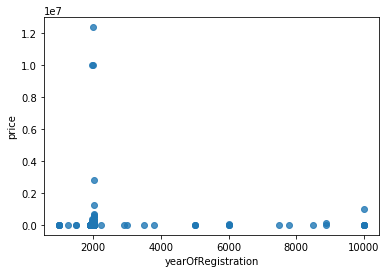

In [25]:
sns.regplot(x='yearOfRegistration' , y = 'price' , scatter = True , data = cars , fit_reg = False)

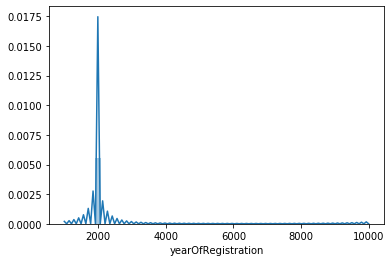

In [26]:
sns.distplot(cars['yearOfRegistration'])

In [27]:
 pricecounts = cars['price'].value_counts().sort_index()

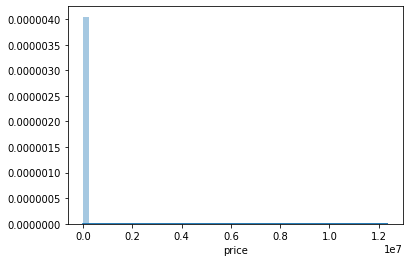

In [28]:
sns.distplot(cars['price'])

In [29]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

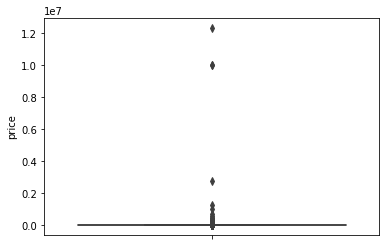

In [30]:
sns.boxplot(y=cars['price'])

In [31]:
sum(cars['price']>150000)

34

In [32]:
sum(cars['price']<100
   )

1748

In [33]:
 powercount = cars['powerPS'].value_counts().sort_index()

In [34]:
powercount

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

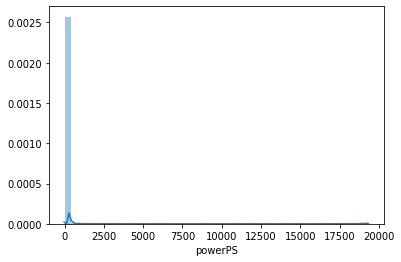

In [35]:
sns.distplot(cars['powerPS'])

In [36]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

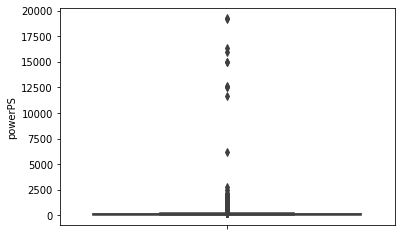

In [37]:
sns.boxplot(y = cars['powerPS'])

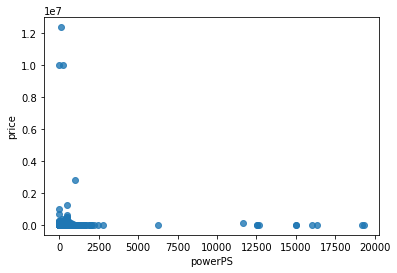

In [38]:
sns.regplot( x='powerPS' , y ='price' , scatter = True , data = cars , fit_reg = False)

In [39]:
sum(cars['powerPS']>500)

115

In [40]:
sum(cars['powerPS']<10)

5565

In [41]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


In [42]:
cars = cars [ (cars.yearOfRegistration <= 2018)
            & (cars.yearOfRegistration >= 1950)
            & (cars.price >= 100)
            & (cars.price <= 150000)
            & (cars.powerPS >= 10)
            & (cars.powerPS <= 500)]

In [43]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no


In [44]:
cars['monthOfRegistration']/=12

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
cars['monthOfRegistration']

0       0.250
1       0.500
2       0.917
3       1.000
4       0.917
         ... 
49991   0.667
49992   0.750
49993   0.667
49995   0.250
50000   0.833
Name: monthOfRegistration, Length: 42772, dtype: float64

In [46]:
cars['Age'] = (2018 -cars['yearOfRegistration'])+cars['monthOfRegistration']

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.917
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.667
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.667
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [48]:
cars['Age'] = round(cars['Age'],2)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
cars['Age']

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
49991   14.670
49992   20.750
49993   19.670
49995   17.250
50000   12.830
Name: Age, Length: 42772, dtype: float64

In [50]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [51]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [52]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

In [53]:
cars

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


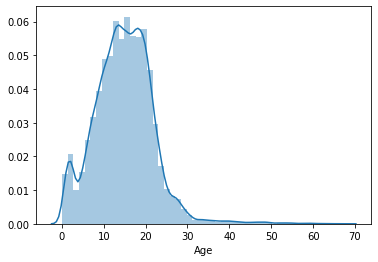

In [54]:
sns.distplot(cars['Age'])

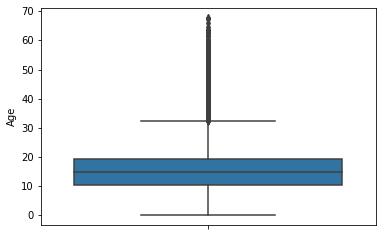

In [55]:
sns.boxplot(y=cars['Age'])

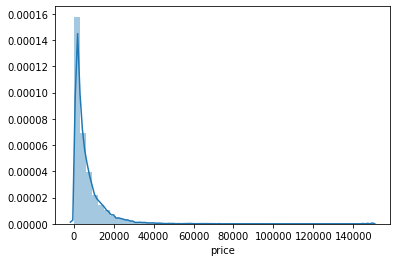

In [56]:
sns.distplot(cars['price'])

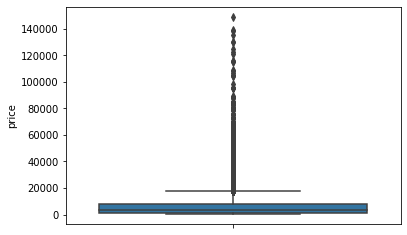

In [57]:
sns.boxplot(y = cars['price'])

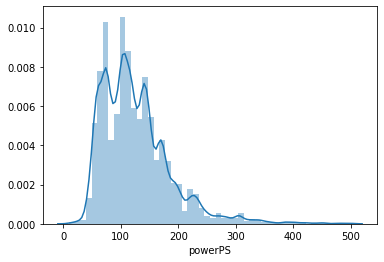

In [58]:
sns.distplot(cars['powerPS'])

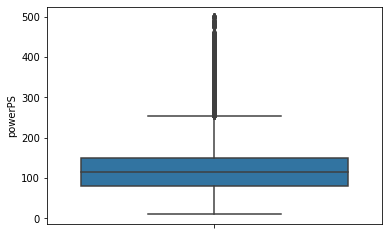

In [59]:
sns.boxplot(y=cars['powerPS'])

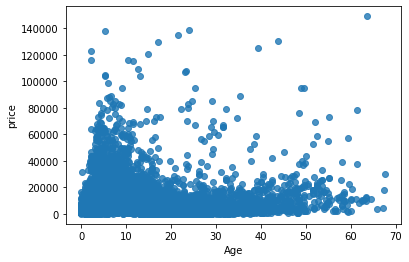

In [60]:
sns.regplot( x = 'Age' , y = 'price' , scatter = True , fit_reg = False , data = cars)

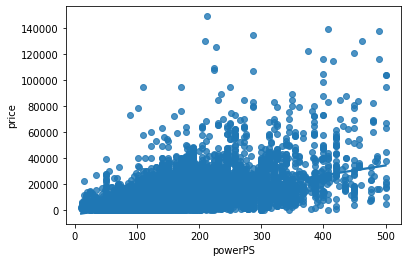

In [61]:
sns.regplot( x = 'powerPS' , y = 'price' , scatter = True ,fit_reg = True , data = cars)

In [62]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [63]:
pd.crosstab(cars['seller'] , columns = 'count' ,normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


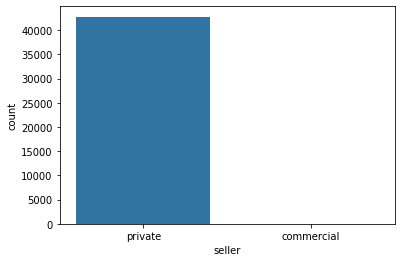

In [64]:
sns.countplot('seller' , data = cars)

In [65]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

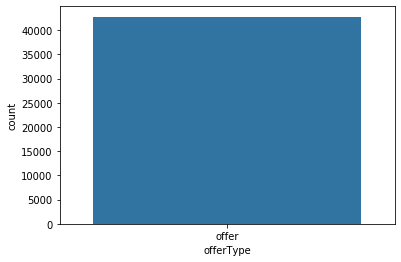

In [66]:
sns.countplot(x = 'offerType' , data = cars)

In [67]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [68]:
pd.crosstab( cars['abtest'] , columns = 'count' , normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


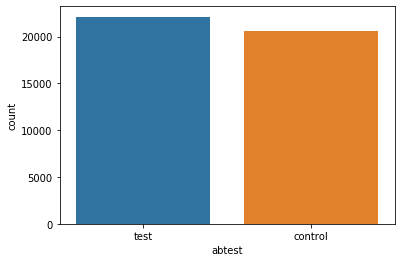

In [69]:
sns.countplot ( x = cars['abtest'])

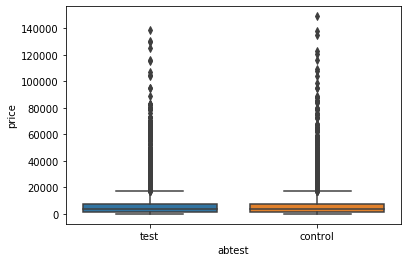

In [70]:
sns.boxplot( x = 'abtest' , y = 'price' ,  data = cars)

In [71]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [72]:
pd.crosstab(cars['vehicleType'] , columns = 'count' , normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


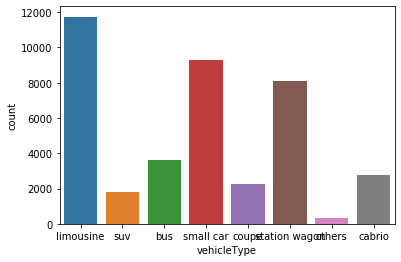

In [73]:
sns.countplot(cars['vehicleType'])

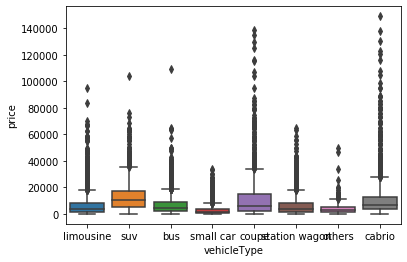

In [74]:
sns.boxplot( x = 'vehicleType' , y = 'price' ,  data = cars)

In [75]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

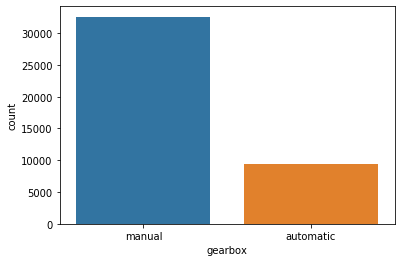

In [76]:
sns.countplot(cars['gearbox'])

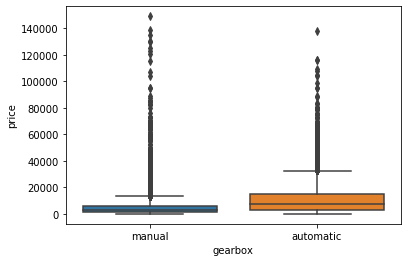

In [77]:
sns.boxplot( x = 'gearbox' , y = 'price' , data = cars)

In [78]:
 cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
serie_3          1
serie_2          1
200              1
rangerover       1
elefantino       1
Name: model, Length: 247, dtype: int64

In [79]:
pd.crosstab(cars['model'] , columns= 'count' , normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


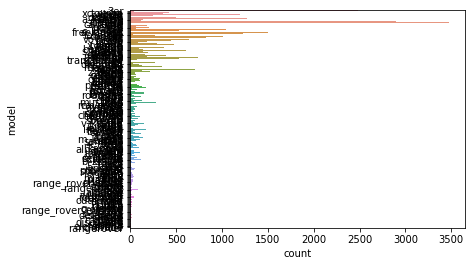

In [80]:
sns.countplot(y = cars['model'] )

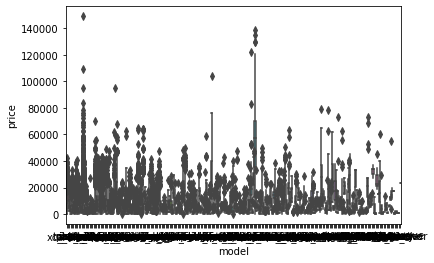

In [81]:
sns.boxplot(x = 'model' , y = 'price' , data = cars)

In [82]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [83]:
pd.crosstab(cars['kilometer'] , columns= 'count' , normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


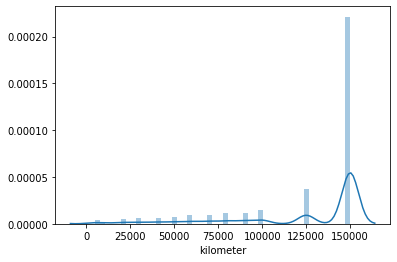

In [84]:
sns.distplot(cars['kilometer'])

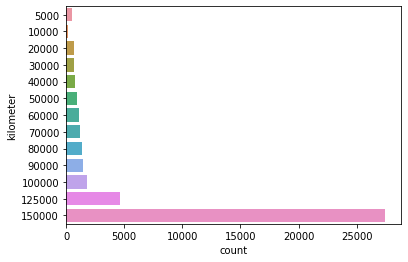

In [85]:
sns.countplot(y = cars['kilometer'])

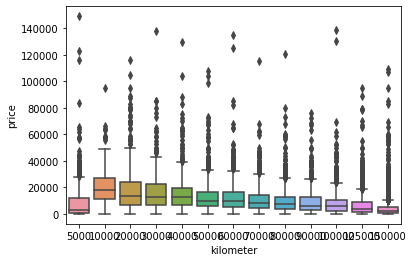

In [86]:
sns.boxplot(x = 'kilometer' , y = 'price' , data = cars)


In [87]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

In [88]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [89]:
pd.crosstab(cars['fuelType'] , columns='count' , normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


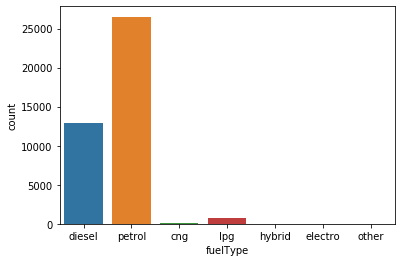

In [90]:
sns.countplot(cars['fuelType'])

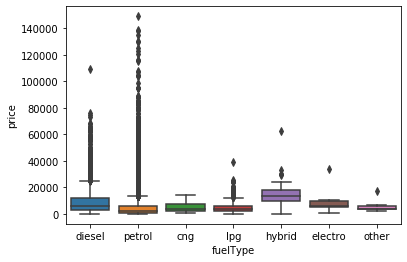

In [91]:
sns.boxplot( x = 'fuelType' , y = 'price' , data = cars)

In [92]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [93]:
pd.crosstab(cars['brand'] , columns = 'count' , normalize = True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


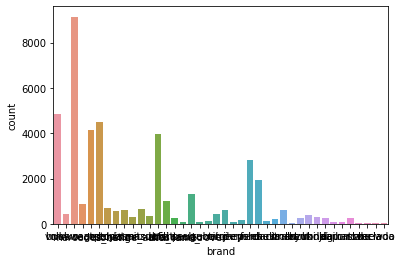

In [94]:
sns.countplot(cars['brand'])

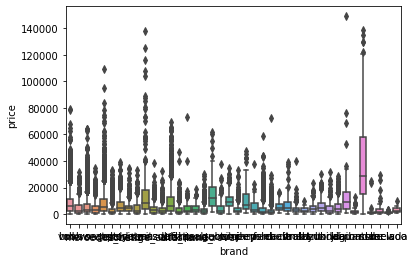

In [95]:
sns.boxplot( x = 'brand' , y = 'price' , data = cars)

In [96]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [97]:
pd.crosstab(cars['notRepairedDamage'] , columns = 'counts' , normalize = True)


col_0,counts
notRepairedDamage,
no,0.891
yes,0.109


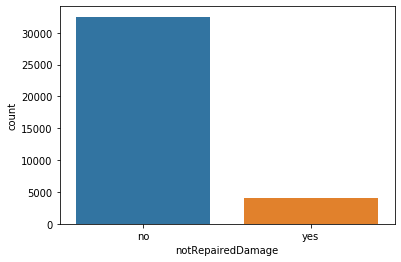

In [98]:
sns.countplot(cars['notRepairedDamage'])

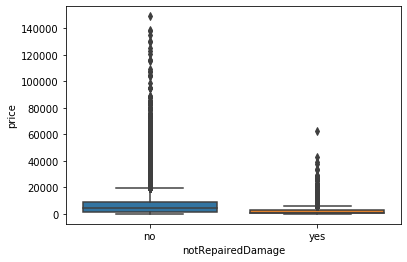

In [99]:
sns.boxplot( x = 'notRepairedDamage' , y = 'price' , data = cars)

In [100]:
col = ['seller' , 'abtest' , 'offerType']

In [101]:
cars = cars.drop(columns = col , axis = 1)

In [102]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [103]:
carcopy = cars.copy()

In [104]:
carcopy

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [105]:
carsselect = cars.select_dtypes(exclude = [object])

In [106]:
carsselect

,price,powerPS,kilometer,Age
0,4450,150,150000,15.250
1,13299,163,150000,13.500
2,3200,101,150000,15.920
3,4500,86,60000,13.000
4,18750,185,150000,10.920
...,...,...,...,...
49991,10900,231,150000,14.670
49992,790,82,150000,20.750
49993,830,60,125000,19.670
49995,2290,101,150000,17.250


In [107]:
correlation = carsselect.corr()

In [108]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [109]:
carsselect.corr().loc[:,'price']

price        1.000
powerPS      0.575
kilometer   -0.440
Age         -0.336
Name: price, dtype: float64

In [110]:
carsselect.corr().loc[:,'price'].abs()

price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [111]:
carsselect.corr().loc[:,'price'].abs().sort_values()

Age         0.336
kilometer   0.440
powerPS     0.575
price       1.000
Name: price, dtype: float64

In [112]:
carsselect.corr().loc[:,'price'].abs().sort_values(ascending = False)

price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [113]:
carsselect.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# Baseline model for omitted data

In [114]:
carsomit = cars.dropna(axis = 0)

In [115]:
carsomit

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [116]:
carsomit = pd.get_dummies(carsomit,drop_first = True)

In [117]:
carsomit

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [118]:
print(col)

['seller', 'abtest', 'offerType']


In [119]:
for cell in carsomit.columns:
    print(cell)

price
powerPS
kilometer
Age
vehicleType_cabrio
vehicleType_coupe
vehicleType_limousine
vehicleType_others
vehicleType_small car
vehicleType_station wagon
vehicleType_suv
gearbox_manual
model_147
model_156
model_159
model_1_reihe
model_1er
model_200
model_2_reihe
model_300c
model_3_reihe
model_3er
model_4_reihe
model_500
model_5_reihe
model_5er
model_601
model_6_reihe
model_6er
model_7er
model_80
model_850
model_90
model_900
model_9000
model_911
model_a1
model_a2
model_a3
model_a4
model_a5
model_a6
model_a8
model_a_klasse
model_accord
model_agila
model_alhambra
model_almera
model_altea
model_amarok
model_antara
model_arosa
model_astra
model_auris
model_avensis
model_aveo
model_aygo
model_b_klasse
model_b_max
model_beetle
model_berlingo
model_bora
model_boxster
model_bravo
model_c1
model_c2
model_c3
model_c4
model_c5
model_c_klasse
model_c_max
model_c_reihe
model_caddy
model_calibra
model_captiva
model_carisma
model_carnival
model_cayenne
model_cc
model_ceed
model_charade
model_cherokee


In [120]:
carsomit.columns

Index(['price', 'powerPS', 'kilometer', 'Age', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_limousine', 'vehicleType_others',
       'vehicleType_small car', 'vehicleType_station wagon',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=301)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [122]:
x1 = carsomit.drop(['price'] , axis = 'columns' , inplace = False)

In [123]:
x1

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,163,150000,13.500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [124]:
y1 = carsomit['price']
prices = pd.DataFrame({"1.) Before":y1,"2.) After":np.log(y1)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9E9BFD7C8>,
      dtype=object)

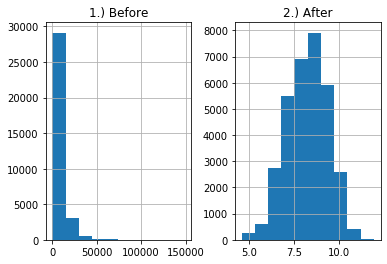

In [125]:
prices.hist()

In [126]:
y1

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 32884, dtype: int64

In [127]:
y1 = np.log(y1)

In [128]:
y1

1       9.495
3       8.412
4       9.839
5       6.896
7       7.244
         ... 
49991   9.297
49992   6.672
49993   6.721
49995   7.736
50000   7.003
Name: price, Length: 32884, dtype: float64

In [129]:
x_train , x_test , y_train , y_test = train_test_split(x1,y1,test_size = 0.3 , random_state = 3)

In [130]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# Baseline Model for omitted Data : We are making a base model y using a Test data mean value . This is to set a benchmark and to compare with our regression model

In [131]:
basepred = np.mean(y_test)

In [132]:
print(basepred)

8.249615787653337


In [133]:
basepred = np.repeat(basepred , len(y_test))

In [134]:
basepred


array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [135]:
basepred.shape

(9866,)

In [136]:
y_test

10171   8.756
8102    9.680
1525    8.699
40666   7.208
46012   7.596
         ... 
1926    6.985
35328   5.991
16376   9.333
28170   7.600
38206   8.189
Name: price, Length: 9866, dtype: float64

In [137]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test , basepred))

In [138]:
print(base_root_mean_square_error)

1.1274483657478247


# So the RMSE turns out to be 1.13 roughly.So,this is a benchmark for comparision.So now any model we are going to build in future should give a RMSE less than this.

# Lets Build a LinearRegression model for omitted Data

In [139]:
lgr = LinearRegression(fit_intercept = True)

In [140]:
modellinear1 = lgr.fit(x_train , y_train)

In [141]:
carspredictionslinear1 = lgr.predict(x_test)

In [142]:
linearmse1 = np.sqrt(mean_squared_error(y_test , carspredictionslinear1 ))

In [143]:
linearmse1

0.5455481266513839

In [147]:
r2lineartest1 = modellinear1.score(x_test,y_test)
r2lineartest1


0.7658615091649246

In [149]:
r2lineartrain1 = modellinear1.score(x_train,y_train)
r2lineartrain1

0.7800936978183916

In [150]:
residuals1 = y_test - carspredictionslinear1

In [151]:
residuals1

10171    0.324
8102    -0.100
1525    -0.143
40666   -0.371
46012   -0.639
         ...  
1926     0.426
35328   -0.898
16376    0.631
28170    0.100
38206    0.286
Name: price, Length: 9866, dtype: float64

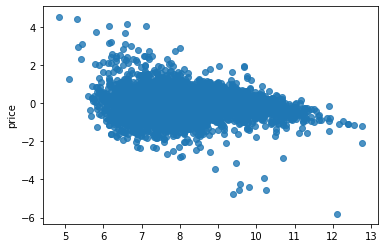

In [152]:
sns.regplot(x = carspredictionslinear1 , y = residuals1 , scatter = True ,fit_reg = False , data = cars )

In [154]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

# Lets build a Random Forest with omitted data

In [156]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_features = 'auto',
                           max_depth = 100,
                           min_samples_split = 10,
                           min_samples_leaf = 4,
                           random_state = 1)

In [157]:
modelrf1 = rf.fit(x_train , y_train)

In [158]:
carspredictionrf1 = rf.predict(x_test)

In [159]:
carspredictionrf1

array([8.70182348, 9.57250428, 8.19505376, ..., 9.11387352, 7.45210229,
       7.80044374])

In [161]:
rfmse1 = np.sqrt(mean_squared_error(y_test,carspredictionrf1))

In [162]:
rfmse1

0.4360736289370223

In [164]:
r2_rf_test1 = modelrf1.score(x_test , y_test)

In [165]:
r2_rf_train1 = modelrf1.score(x_train , y_train)

In [166]:
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


# Model Building with inputed data

In [172]:
cars_inputed = cars.apply(lambda x : x.fillna( x.median() ) 
                        if x.dtype == 'float' else  
                        x.fillna(x.value_counts().index[0]))

In [173]:
cars_inputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [174]:
cars_inputed = pd.get_dummies(cars_inputed , drop_first = True )

In [175]:
cars_inputed.shape

(42772, 304)

In [176]:
x2 = cars_inputed.drop(['price'] , axis = 'columns' , inplace = False)

In [178]:
y2 = cars_inputed['price']
prices2 = pd.DataFrame({"1.) Before":y2,"2.) After":np.log(y2)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9EBBD31C8>,
      dtype=object)

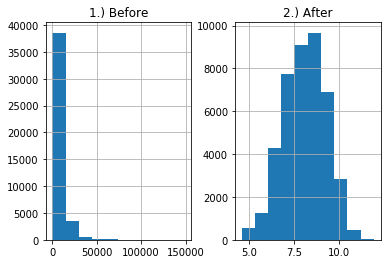

In [179]:
prices2.hist()

In [180]:
y2 = np.log(y2)

In [181]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x2,y2,test_size = 0.3 , random_state = 3)

In [182]:
x_train1.shape , x_test1.shape , y_train1.shape , y_test1.shape

((29940, 303), (12832, 303), (29940,), (12832,))

In [184]:
29940/12832

2.333229426433915

# Baseline Model for inputed Data : We are making a base model y using a Test data mean value . This is to set a benchmark and to compare with our regression and Randomforest model

In [189]:
basepred1 = np.mean(y_test1)

In [190]:
basepred1

8.068391740519193

In [193]:
y_test1

21733   9.297
49665   8.445
27892   9.105
15319   7.719
29221   9.999
         ... 
43629   9.205
33666   6.872
27154   9.104
18825   7.438
32119   9.297
Name: price, Length: 12832, dtype: float64

In [194]:
basepred1 = np.repeat(basepred1 , len(y_test1))

In [197]:
base_root_mean_square_error_inputed = np.sqrt(mean_squared_error(y_test1 , basepred1))

In [198]:
base_root_mean_square_error_inputed 

1.1884349112889792

# Lets build a Linear Regression Model with inputed data

In [199]:
lgr2 = LinearRegression(fit_intercept = True)

In [205]:
modellinear2 = lgr2.fit(x_train1 , y_train1)

In [206]:
carspredictionslinear2 = lgr2.predict(x_test1)

In [208]:
linearmse2 = np.sqrt(mean_squared_error(y_test1 , carspredictionslinear2 ))

In [209]:
linearmse2

0.6483956449231292

In [211]:
r2lineartest2 = modellinear2.score(x_test1,y_test1)
r2lineartest2


0.7023339008631189

In [212]:
r2lineartrain2 = modellinear2.score(x_train1,y_train1)
r2lineartrain2

0.7071658736894363

In [213]:
residuals2 = y_test1 - carspredictionslinear2

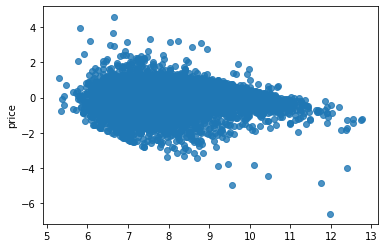

In [214]:
sns.regplot(x = carspredictionslinear2 , y = residuals2 , scatter = True ,fit_reg = False , data = cars )

In [215]:
residuals2 .describe()

count   12832.000
mean       -0.024
std         0.648
min        -6.591
25%        -0.348
50%         0.043
75%         0.374
max         4.607
Name: price, dtype: float64

# Lets build a Random Forest model with the inputed data

In [221]:
rf2 = RandomForestRegressor(n_estimators = 100,
                           max_features = 'auto',
                           max_depth = 100,
                           min_samples_split = 10,
                           min_samples_leaf = 4,
                           random_state = 1)

In [222]:
modelrf2 = rf2.fit(x_train1 , y_train1)

In [223]:
carspredictionrf2 = rf2.predict(x_test1)

In [224]:
carspredictionrf2

array([9.02751276, 8.56547032, 9.29259302, ..., 9.03441682, 7.66792659,
       9.07587883])

In [225]:
rfmse2 = np.sqrt(mean_squared_error(y_test1,carspredictionrf2))

In [231]:
rfmse2

0.494313994408829

In [227]:
r2_rf_test2 = modelrf2.score(x_test1 , y_test1)

In [228]:
r2_rf_train2 = modelrf1.score(x_train1 , y_train1)

In [229]:
print(r2_rf_test2,r2_rf_train2)

0.8269964521311131 0.9024289431669166
